# Funciones de distribucion de probabilidades

## Distribucion Uniforme

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = 1 #limite inferior
b = 100 #limite superior
n = 1000000 # N muestras
data = np.random.uniform(a,b,n)

(array([100033., 100084., 100205.,  99931., 100087., 100283.,  99888.,
         99844., 100012.,  99633.]),
 array([ 1.00021682, 10.90017732, 20.80013782, 30.70009832, 40.60005882,
        50.50001932, 60.39997983, 70.29994033, 80.19990083, 90.09986133,
        99.99982183]),
 <a list of 10 Patch objects>)

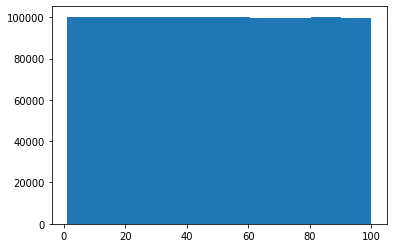

In [3]:
%matplotlib inline
plt.hist(data)

## Distribucion Normal 

In [4]:
data = np.random.randn(1000000)

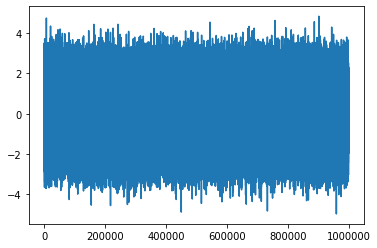

In [5]:
x = range(1,1000001)
plt.plot(x,data)

(array([3.80000e+01, 1.26000e+03, 1.98670e+04, 1.26462e+05, 3.25261e+05,
        3.46248e+05, 1.51660e+05, 2.72090e+04, 1.93300e+03, 6.20000e+01]),
 array([-4.9745352 , -3.99330902, -3.01208285, -2.03085668, -1.04963051,
        -0.06840433,  0.91282184,  1.89404801,  2.87527418,  3.85650036,
         4.83772653]),
 <a list of 10 Patch objects>)

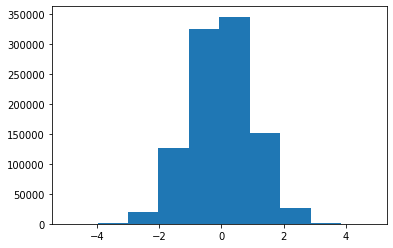

In [6]:
plt.hist(data)

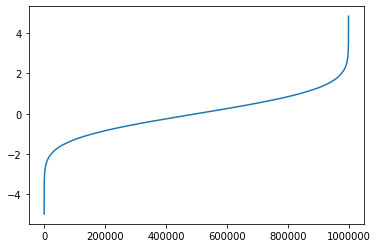

In [7]:
plt.plot(x,sorted(data))

(array([  14.,  103.,  539., 1612., 2808., 2743., 1583.,  503.,   87.,
           8.]),
 array([-4.12292542, -2.18863252, -0.25433961,  1.67995329,  3.6142462 ,
         5.5485391 ,  7.48283201,  9.41712491, 11.35141782, 13.28571072,
        15.22000363]),
 <a list of 10 Patch objects>)

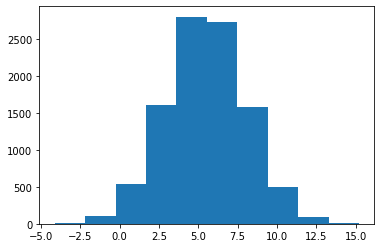

In [8]:
mu = 5.5 #media
sd = 2.5 #desvio estandar
data = mu + sd * np.random.randn(10000) # z = (X - mu) / sd -> N(0,1) => X =mu + sd * z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[-1.00166609,  1.1880337 , -1.33699855,  0.8498423 ],
       [ 1.25292166,  1.87309671, -1.38932474, -0.77006014]])

## Simulacion de Monte Carlo

* generamos dos nuemros aleatorios entre 0 y 1
* calcular x * x + y * y
      * si el valor es < 1 -> estamos dentro del ciruculo    
      * si el valor es > 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del ciruclo y lo dividimos entre el numero total de intentos.
* usamos dicha probabilidad para aproximal el valor de pi
* repetimos el experimentos suficientemente, para obtener diferentes aproximaciones de Pi


In [18]:
def pi_montecarlo(n_de_puntos,n_de_experimentos):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_de_experimentos):
        value = 0
        x = np.random.uniform(0,1,n_de_puntos).tolist()
        y = np.random.uniform(0,1,n_de_puntos).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_de_experimentos
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.142740000000001


(3.142740000000001, [<matplotlib.lines.Line2D at 0x7f00889ff7d0>])

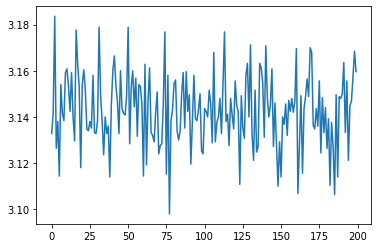

In [24]:
pi_montecarlo(10000,200)

## Dummy Data Sets 

In [28]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n), #normal estandar
        'B': 1.5 + 2.5 * np.random.randn(n), #normal con media 1.5 y desvio 2.5
        'C' : np.random.uniform(5,32,n) # uniforme de 5 a 32
    }
)

In [30]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000186,1.502752,18.484501
std,1.000643,2.500676,7.792225
min,-4.762293,-9.878113,5.000019
25%,-0.674580,-0.183176,11.736583
50%,-0.001270,1.504873,18.474031
75%,0.674485,3.188884,25.229557
max,4.844724,13.606229,31.999985


(array([6.80000e+01, 2.16600e+03, 2.79130e+04, 1.49064e+05, 3.37762e+05,
        3.24048e+05, 1.34080e+05, 2.32320e+04, 1.61800e+03, 4.90000e+01]),
 array([-4.76229263, -3.80159096, -2.84088929, -1.88018761, -0.91948594,
         0.04121573,  1.00191741,  1.96261908,  2.92332075,  3.88402243,
         4.8447241 ]),
 <a list of 10 Patch objects>)

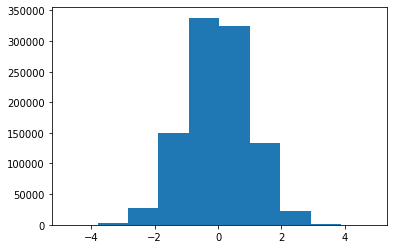

In [31]:
plt.hist(data["A"])

(array([1.55000e+02, 3.62200e+03, 3.78790e+04, 1.71592e+05, 3.44161e+05,
        3.03581e+05, 1.17365e+05, 2.01290e+04, 1.46200e+03, 5.40000e+01]),
 array([-9.87811276, -7.52967854, -5.18124432, -2.8328101 , -0.48437589,
         1.86405833,  4.21249255,  6.56092677,  8.90936099, 11.25779521,
        13.60622943]),
 <a list of 10 Patch objects>)

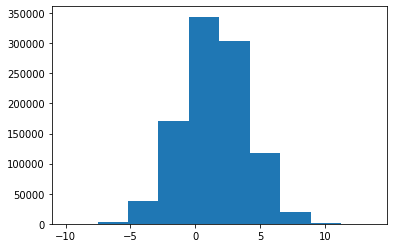

In [32]:
plt.hist(data["B"])

(array([100169., 100324., 100005., 100123., 100331., 100166.,  99697.,
         99812.,  99577.,  99796.]),
 array([ 5.0000194 ,  7.70001593, 10.40001246, 13.10000899, 15.80000552,
        18.50000205, 21.19999858, 23.89999511, 26.59999164, 29.29998817,
        31.9999847 ]),
 <a list of 10 Patch objects>)

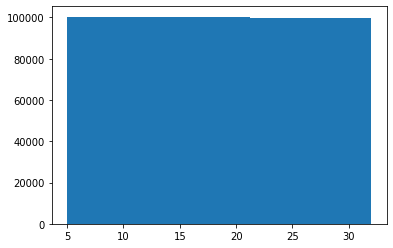

In [33]:
plt.hist(data["C"])

In [34]:
data = pd.read_csv("python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [35]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [36]:
columns_names = data.columns.values.tolist()

In [38]:
a = len(columns_names)
a

21

In [42]:
new_data = pd.DataFrame(
    {
        'Column Name':columns_names,
        'A': np.random.randn(a), #normal estandar
        'B': 1.5 + 2.5 * np.random.uniform(0,1,a), #normal con media 1.5 y desvio 2.5
    }, index=range(42,42 +a)
)

In [43]:
new_data

,Column Name,A,B
42,State,1.236853,2.530947
43,Account Length,0.100771,3.884877
44,Area Code,0.642737,3.166433
45,Phone,0.535451,1.779358
46,Int'l Plan,0.526947,3.309118
47,VMail Plan,-0.557404,1.608733
48,VMail Message,-0.177099,3.801807
49,Day Mins,1.884387,2.022069
50,Day Calls,0.928349,2.690537
51,Day Charge,0.154987,2.722608
